[Xarray](https://docs.xarray.dev/) is a powerful Python library designed for working with multi-dimensional labeled datasets, often used in fields such as climate science, oceanography, and remote sensing. It provides a high-level interface for manipulating and analyzing datasets that can be thought of as extensions of NumPy arrays. Xarray is particularly useful for geospatial data because it supports labeled axes (dimensions), coordinates, and metadata, making it easier to work with datasets that vary across time, space, and other dimensions.

# Learning Objectives
By the end of this lecture, you should be able to:

- Understand the basic concepts and data structures in Xarray, including `DataArray` and `Dataset`.
- Load and inspect multi-dimensional geospatial datasets using Xarray.
- Perform basic operations on Xarray objects, such as selection, indexing, and arithmetic operations.
- Use Xarray to efficiently work with large geospatial datasets, including time series and raster data.
- Apply Xarray to common geospatial analysis tasks, such as calculating statistics, regridding, and visualization.

# What is Xarray?
Xarray extends the capabilities of NumPy by providing a data structure for labeled, multi-dimensional arrays. The two main data structures in Xarray are:

- **DataArray**: A labeled, multi-dimensional array, which includes dimensions, coordinates, and attributes.
- **Dataset**: A collection of `DataArray` objects that share the same dimensions.

![dataset](./images/dataset-diagram.png)

Xarray is particularly useful for working with datasets where dimensions have meaningful labels (e.g., time, latitude, longitude) and where metadata is important.

# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

xr.set_options(keep_attrs=True, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

# Xarray Data Structures
Xarray provides two core data structures:

- **DataArray**: A single multi-dimensional array with labeled dimensions, coordinates, and metadata.
- **Dataset**: A collection of `DataArray` objects, each corresponding to a variable, sharing the same dimensions and coordinates.

# Loading a Dataset
Xarray offers built-in access to several [tutorial datasets](https://docs.xarray.dev/en/latest/generated/xarray.tutorial.open_dataset.html), which we can load with `xr.tutorial.open_dataset`. Here, we load an air temperature dataset:

In [2]:
ds = xr.tutorial.open_dataset("air_temperature")
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

This dataset is stored in the [netCDF](https://www.unidata.ucar.edu/software/netcdf) format, a common format for scientific data. Xarray automatically parses metadata like dimensions and coordinates.

# Working with DataArrays

The `DataArray` is the core data structure in Xarray. It includes data values, dimensions (e.g., time, latitude, longitude), and the coordinates for each dimension.

In [3]:
# Access a specific DataArray
temperature = ds["air"]
temperature

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
[3869000 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [4]:
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
[3869000 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

# DataArray Components
- **Values**: The actual data stored in a NumPy array or similar structure.
- **Dimensions**: Named axes of the data (e.g., time, latitude, longitude).
- **Coordinates**: Labels for the values in each dimension (e.g., specific times or geographic locations).
- **Attributes**: Metadata associated with the data (e.g., units, descriptions).

You can extract and print the values, dimensions, and coordinates of a `DataArray`:

In [18]:
temperature.shape, temperature.values.shape

((2920, 25, 53), (2920, 25, 53))

In [5]:
temperature.values

array([[[241.2 , 242.5 , ..., 235.5 , 238.6 ],
        [243.8 , 244.5 , ..., 235.3 , 239.3 ],
        ...,
        [295.9 , 296.2 , ..., 295.9 , 295.2 ],
        [296.29, 296.79, ..., 296.79, 296.6 ]],

       [[242.1 , 242.7 , ..., 233.6 , 235.8 ],
        [243.6 , 244.1 , ..., 232.5 , 235.7 ],
        ...,
        [296.2 , 296.7 , ..., 295.5 , 295.1 ],
        [296.29, 297.2 , ..., 296.4 , 296.6 ]],

       ...,

       [[245.79, 244.79, ..., 243.99, 244.79],
        [249.89, 249.29, ..., 242.49, 244.29],
        ...,
        [296.29, 297.19, ..., 295.09, 294.39],
        [297.79, 298.39, ..., 295.49, 295.19]],

       [[245.09, 244.29, ..., 241.49, 241.79],
        [249.89, 249.29, ..., 240.29, 241.69],
        ...,
        [296.09, 296.89, ..., 295.69, 295.19],
        [297.69, 298.09, ..., 296.19, 295.69]]])

In [6]:
temperature.dims

('time', 'lat', 'lon')

In [7]:
temperature.coords

Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00

In [8]:
temperature.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32)}

# Indexing and Selecting Data
Xarray allows you to easily select data based on dimension labels, which is very intuitive when working with geospatial data.

In [9]:
# Select data for a specific time and location
selected_data = temperature.sel(time="2013-01-01",
                                lat=40.0,
                                lon=260.0)
selected_data

<xarray.DataArray 'air' (time: 4)> Size: 32B
array([265.2, 266.2, 262.4, 267.5])
Coordinates:
    lat      float32 4B 40.0
    lon      float32 4B 260.0
  * time     (time) datetime64[ns] 32B 2013-01-01 ... 2013-01-01T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [10]:
# Slice data across a range of time
time_slice = temperature.sel(time=slice("2013-01-01", "2013-01-31"))
time_slice

<xarray.DataArray 'air' (time: 124, lat: 25, lon: 53)> Size: 1MB
array([[[241.2 , 242.5 , ..., 235.5 , 238.6 ],
        [243.8 , 244.5 , ..., 235.3 , 239.3 ],
        ...,
        [295.9 , 296.2 , ..., 295.9 , 295.2 ],
        [296.29, 296.79, ..., 296.79, 296.6 ]],

       [[242.1 , 242.7 , ..., 233.6 , 235.8 ],
        [243.6 , 244.1 , ..., 232.5 , 235.7 ],
        ...,
        [296.2 , 296.7 , ..., 295.5 , 295.1 ],
        [296.29, 297.2 , ..., 296.4 , 296.6 ]],

       ...,

       [[238.  , 237.7 , ..., 240.89, 242.3 ],
        [238.1 , 237.1 , ..., 236.5 , 239.  ],
        ...,
        [296.6 , 296.9 , ..., 296.1 , 295.9 ],
        [297.5 , 297.4 , ..., 296.79, 296.7 ]],

       [[238.1 , 238.39, ..., 240.2 , 241.3 ],
        [240.3 , 239.7 , ..., 236.3 , 238.39],
        ...,
        [296.29, 296.6 , ..., 296.5 , 295.9 ],
        [297.4 , 297.4 , ..., 297.2 , 296.79]]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 992B 2013-01-01 ... 2013-01-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

# Performing Operations on DataArrays
You can perform arithmetic operations directly on `DataArray` objects, similar to how you would with NumPy arrays. Xarray also handles broadcasting automatically.

In [11]:
# Calculate the mean temperature over time
mean_temperature = temperature.mean(dim="time")
mean_temperature

<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
260.4 260.2 259.9 259.5 259.0 258.6 ... 298.0 297.9 297.8 297.3 297.3 297.3
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [12]:
# Subtract the mean temperature from the original data
anomalies = temperature - mean_temperature
anomalies

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
-19.18 -17.68 -16.39 -15.48 -14.92 ... -0.5012 -0.6276 -0.8482 -1.091 -1.615
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

# Visualization with Xarray
Xarray integrates well with Matplotlib and other visualization libraries, making it easy to create plots directly from `DataArray` and `Dataset` objects.

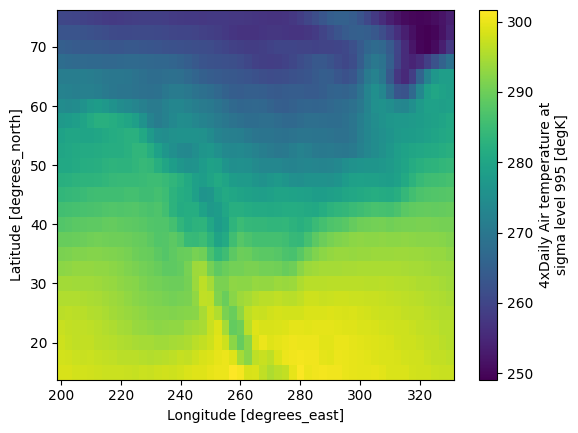

In [13]:
# Plot the mean temperature
mean_temperature.plot()
plt.show()

You can customize the appearance of plots by passing arguments to the `plot` method. For example, you can specify the color map, add labels, and set the figure size.

Text(0.5, 1.0, 'Mean Temperature')

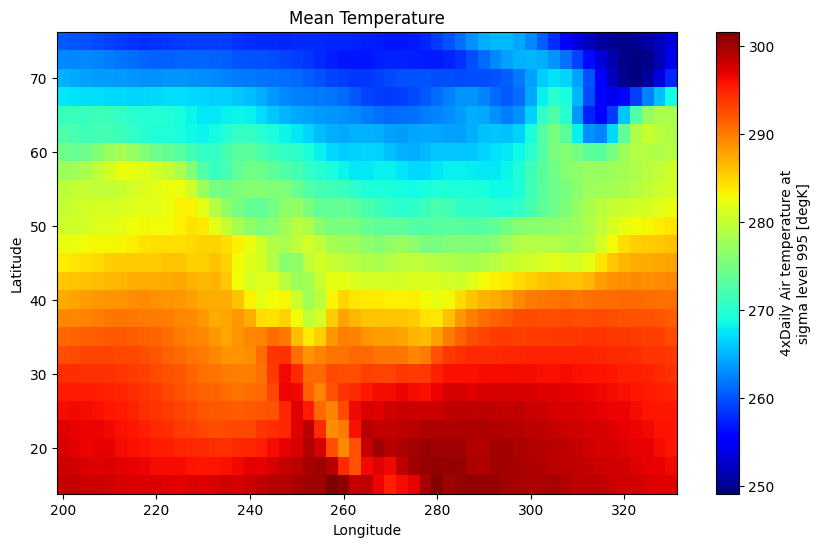

In [21]:
mean_temperature.plot(cmap="jet", figsize=(10, 6))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Mean Temperature")

You can also select a specific location using the `sel` method and plot a time series of temperature at that location.

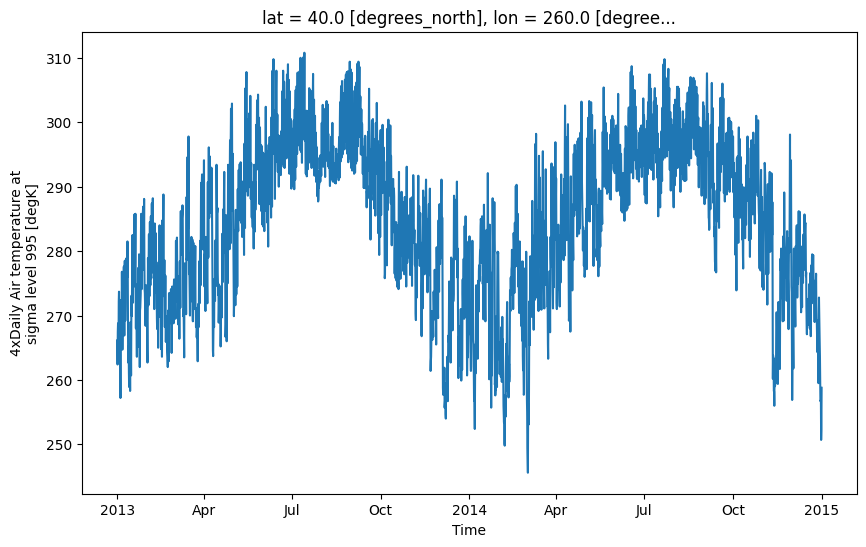

In [23]:
# Plot a time series for specific location
temperature.sel(lat=40.0, lon=260.0).plot(figsize=(10, 6))
plt.show()

# Working with Datasets
A `Dataset` is a collection of `DataArray` objects. It is useful when you need to work with multiple related variables.

In [24]:
# List all variables in the dataset
print(ds.data_vars)

Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7


In [25]:
# Access a DataArray from the Dataset
temperature = ds["air"]

In [26]:
# Perform operations on the Dataset
mean_temp_ds = ds.mean(dim="time")
mean_temp_ds

<xarray.Dataset> Size: 11kB
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Data variables:
    air      (lat, lon) float64 11kB 260.4 260.2 259.9 ... 297.3 297.3 297.3
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

# Why Use Xarray?
Xarray is valuable for handling multi-dimensional data, especially in scientific applications. It provides metadata, dimension names, and coordinate labels, making it much easier to understand and manipulate data compared to raw NumPy arrays

# Without Xarray (Using NumPy)
Here’s how a task might look without Xarray, using NumPy arrays:

In [27]:
lat = ds.air.lat.data
lon = ds.air.lon.data
temp = ds.air.data

In [28]:
temp.shape

(2920, 25, 53)

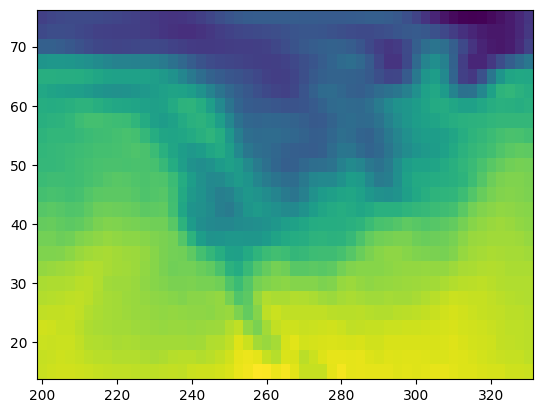

In [29]:
plt.figure()
plt.pcolormesh(lon, lat, temp[0, :, :])

While this approach works, it’s not clear what `0` refers to (in this case, it’s the first time step).

# With Xarray
With Xarray, you can use more intuitive and readable indexing with `sel` and `isel`:

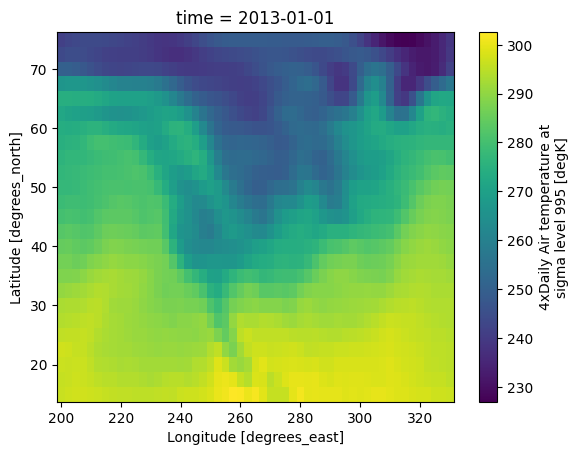

In [30]:
ds.air.isel(time=0).plot(x="lon")

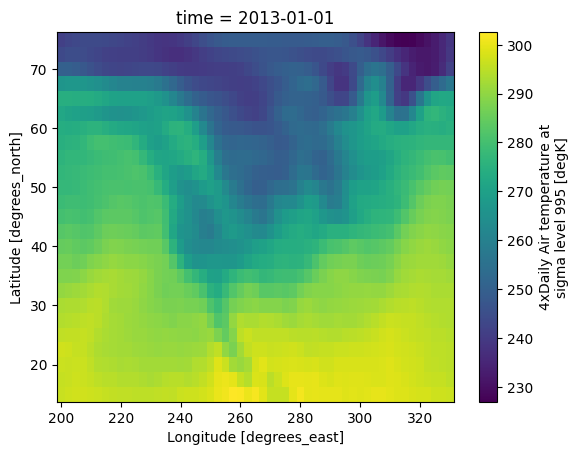

In [33]:
ds.air.sel(time="2013-01-01T00:00:00").plot(x="lon")

This example selects the first time step and plots it using labeled axes (`lat` and `lon`), which is much clearer.

# Advanced Indexing: Label vs. Position-Based Indexing
Xarray supports both label-based and position-based indexing, making it flexible for data selection.

## Label-based Indexing
You can use `.sel()` to select data based on the labels of coordinates, such as specific times or locations:

In [34]:
# Select all data from May 2013
ds.sel(time="2013-05")

<xarray.Dataset> Size: 1MB
Dimensions:  (lat: 25, time: 124, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 992B 2013-05-01 ... 2013-05-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 1MB 259.2 259.3 259.1 ... 297.6 297.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [35]:
# Slice over time, selecting data between May and July 2013
ds.sel(time=slice("2013-05", "2013-07"))

<xarray.Dataset> Size: 4MB
Dimensions:  (lat: 25, time: 368, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 3kB 2013-05-01 ... 2013-07-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 4MB 259.2 259.3 259.1 ... 299.5 299.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## Position-based Indexing
Alternatively, you can use `.isel()` to select data based on the positions of coordinates:

In [36]:
# Select the first time step, second latitude, and third longitude
ds.air.isel(time=0, lat=2, lon=3)

<xarray.DataArray 'air' ()> Size: 8B
array(247.5)
Coordinates:
    lat      float32 4B 70.0
    lon      float32 4B 207.5
    time     datetime64[ns] 8B 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

# High-Level Computations with Xarray
Xarray offers several high-level operations that make common computations straightforward, such as `groupby`, `resample`, `rolling`, and `weighted`.

## GroupBy Operation
You can calculate statistics such as the seasonal mean of the dataset:

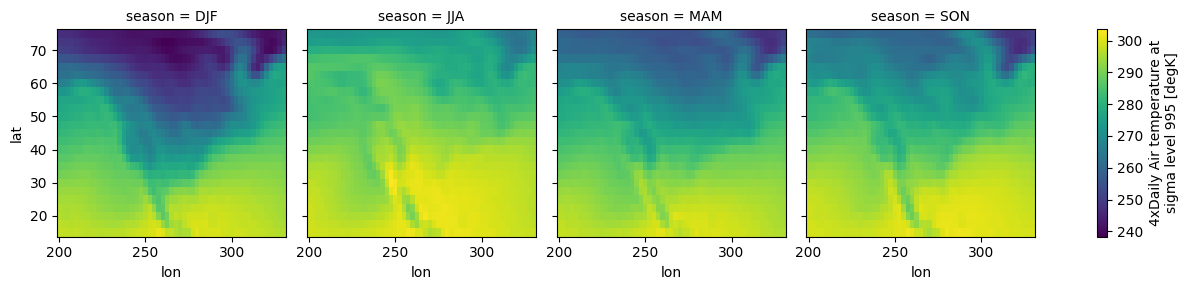

In [37]:
seasonal_mean = ds.groupby("time.season").mean()
seasonal_mean.air.plot(col="season")

## Computation with Weights
Xarray allows for weighted computations, useful in geospatial contexts where grid cells vary in size. For example, you can weight the mean of the dataset by cell area.

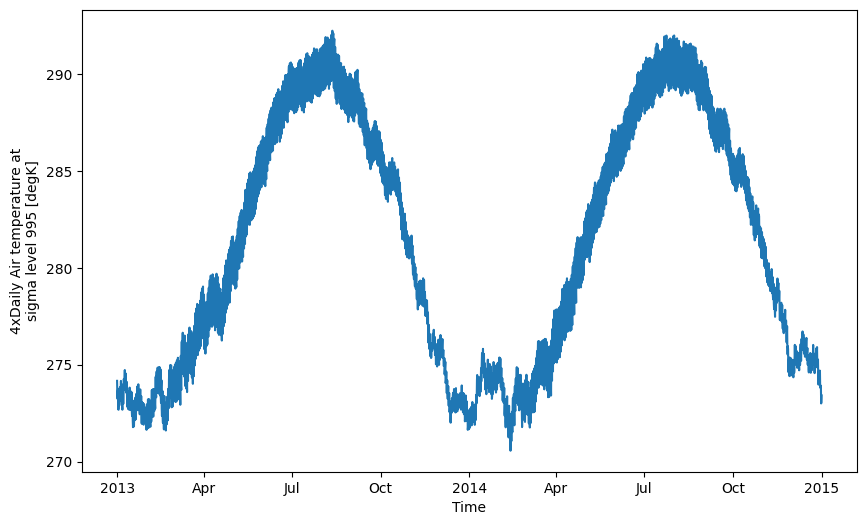

In [39]:
cell_area = xr.ones_like(ds.air.lon)  # Placeholder for actual area calculation
weighted_mean = ds.weighted(cell_area).mean(dim=["lon", "lat"])
weighted_mean.air.plot(figsize=(10, 6))

## Rolling Window Operation
Xarray supports rolling window operations, which are useful for smoothing time series data spatially or temporally. For example, you can smooth the temperature data spatially using a 5x5 window.

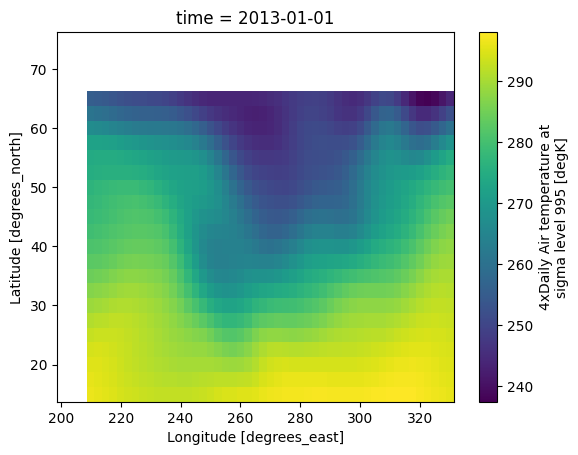

In [40]:
ds.air.isel(time=0).rolling(lat=5, lon=5).mean().plot()

Similarly, you can smooth the temperature data temporally using a 5-day window.

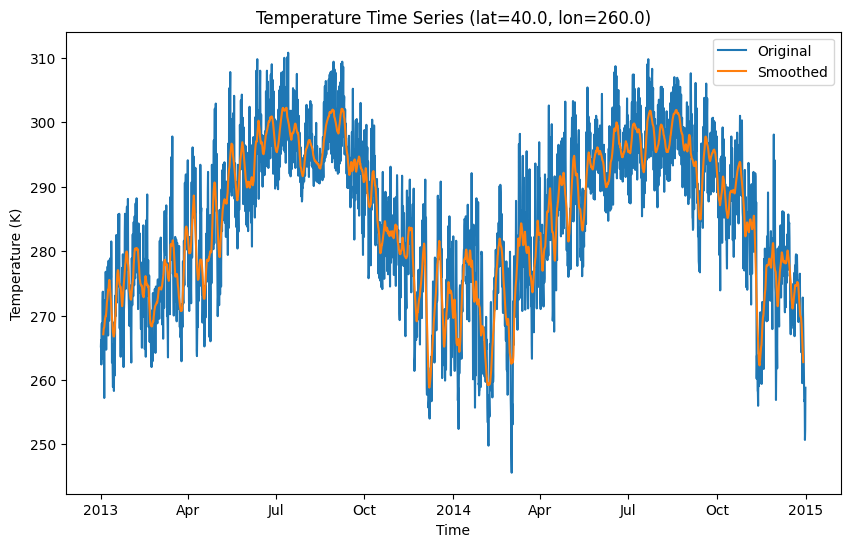

In [41]:
plt.figure(figsize=(10, 6))
# Select the time series at a specific latitude and longitude
temperature = ds["air"].sel(lat=40.0, lon=260.0)

# Plot the original time series
temperature.plot(label="Original")

# Apply rolling mean smoothing with a window size of 20
smoothed_temperature = temperature.rolling(time=20, center=True).mean()

# Plot the smoothed data
smoothed_temperature.plot(label="Smoothed")

# Add a title and labels
plt.title("Temperature Time Series (lat=40.0, lon=260.0)")
plt.xlabel("Time")
plt.ylabel("Temperature (K)")

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Reading and Writing Files
Xarray supports many common scientific data formats, including [netCDF](https://www.unidata.ucar.edu/software/netcdf/) and [Zarr](https://zarr.readthedocs.io/). You can read and write datasets to disk with a few simple commands.

## Writing to netCDF
To save a dataset as a netCDF file:

In [42]:
# Ensure air is in a floating-point format (float32 or float64)
ds["air"] = ds["air"].astype("float32")

# Save the dataset to a NetCDF file
ds.to_netcdf("./out/air_temperature.nc")

## Reading from netCDF
To load a dataset from a netCDF file:

In [44]:
loaded_data = xr.open_dataset("./out/air_temperature.nc")
loaded_data

<xarray.Dataset> Size: 15MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 15MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

# Exercises

## Exercise 1: Exploring a New Dataset
1. Load the Xarray tutorial dataset `rasm`.
2. Inspect the `Dataset` object and list all the variables and dimensions.
3. Select the `Tair` variable (air temperature).
4. Print the attributes, dimensions, and coordinates of `Tair`

## Exercise 2: Data Selection and Indexing
1. Select a subset of the `Tair` data for the date `1980-07-01` and latitude `70.0`.
2. Create a time slice for the entire latitude range between January and March of 1980.
3. Plot the selected time slice as a line plot.

## Exercise 3: Performing Arithmetic Operations
1. Compute the mean of the `Tair` data over the `time` dimension.
2. Subtract the computed mean from the original `Tair` dataset to get the temperature anomalies.
3. Plot the mean temperature and the anomalies on separate plots.

# Exercise 4: GroupBy and Resampling
1. Use `groupby` to calculate the seasonal mean temperature (`Tair`).
2. Use `resample` to calculate the monthly mean temperature for 1980.
3. Plot the seasonal mean for each season and the monthly mean.

## Exercise 5: Writing Data to netCDF
1. Select the temperature anomalies calculated in Exercise 3.
2. Convert the `Tair` variable to `float32` to optimize file size.
3. Write the anomalies data to a new netCDF file named `tair_anomalies.nc`.
4. Load the data back from the file and print its contents.